In [10]:
########################################################################
# import python-library
########################################################################
# from import
import keras.models
import tensorflow as tf
from keras import backend as K
from keras import layers
from keras.models import Model
from keras.initializers import orthogonal
from keras import activations
from tensorflow.keras.models import Sequential
import kapre
from kapre.augmentation import SpecAugment
from kapre.composed import get_melspectrogram_layer

import librosa
from librosa.display import specshow
import numpy as np

In [25]:
y, sr = librosa.load('dev_data/car2/train/section_01_source_train_normal_0000 (179).wav')

In [26]:
spec_augment = SpecAugment(freq_mask_param=20,
                           time_mask_param=1,
                           n_freq_masks=2,
                           n_time_masks=0,
                           mask_value=0)        

In [27]:
def file_to_vectors(file_name,
                    n_mels=64,
                    n_frames=1,
                    n_fft=1024,
                    hop_length=512,
                    power=2.0):
    """
    convert file_name to a vector array.

    file_name : str
        target .wav file

    return : numpy.array( numpy.array( float ) )
        vector array
        * dataset.shape = (dataset_size, feature_vector_length)
    """
    n_frames = 1
    # calculate the number of dimensions
    dims = n_mels * n_frames

    # generate melspectrogram using librosa
    y, sr = librosa.load(file_name, mono=True)
    mel_spectrogram = librosa.feature.melspectrogram(y=y,
                                                     sr=sr,
                                                     n_fft=n_fft,
                                                     hop_length=hop_length,
                                                     n_mels=n_mels,
                                                     power=power)

    # convert melspectrogram to log mel energies
    return mel_spectrogram


In [29]:
audio_tensor = tf.reshape(tf.cast(y, tf.float32), (1, -1, 1))
input_shape = y.reshape(-1, 1).shape

In [30]:
melgram = get_melspectrogram_layer(input_shape=input_shape,
                                                  n_fft=1024,
                                                  return_decibel=True,
                                                  n_mels=128,
                                                  hop_length=429,
                                                  input_data_format='channels_last',
                                                  output_data_format='channels_last')

In [31]:
model = Sequential()
model.add(melgram)
model.add(spec_augment)
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 melspectrogram (Sequential)  (None, 512, 128, 1)      0         
                                                                 
 spec_augment_3 (SpecAugment  (None, 512, 128, 1)      0         
 )                                                               
                                                                 
Total params: 0
Trainable params: 0
Non-trainable params: 0
_________________________________________________________________


In [32]:
import matplotlib.pyplot as plt

(512, 128)


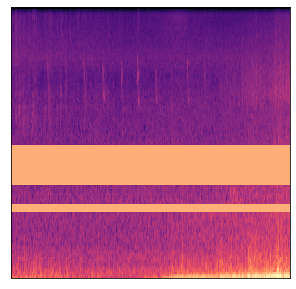

In [33]:
plt.figure(figsize=(5, 5))
dis = model(audio_tensor, training=True).numpy()
dis = dis[0,:,:]
dis = np.squeeze(dis, axis=2)
print(dis.shape)
specshow(dis.T)

(512, 128)


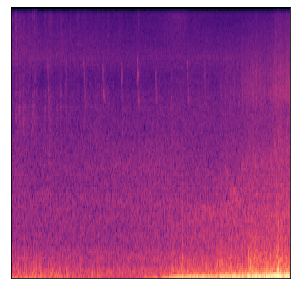

In [34]:
plt.figure(figsize=(5, 5))
dis = model(audio_tensor).numpy()
dis = dis[0,:,:]
dis = np.squeeze(dis, axis=2)
print(dis.shape)
specshow(dis.T)